In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.graph_objects as go

In [33]:
T = np.zeros([100,100])

In [43]:
for i in range(len(T)):
    if i == 0 or i == 99:
        T[i] = 0
    else:
        for j in range(len(T[i])):
            if j == 0 or j == 99:
                T[i][j] = 10
            else:
                T[i][j] = 5

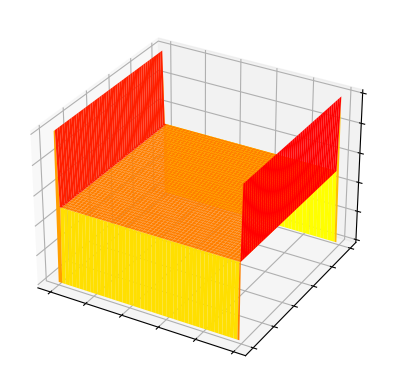

In [44]:
# Plot the surface
X, Y = np.arange(100), np.arange(100)
X, Y = np.meshgrid(X, Y)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, T, cmap=cm.autumn_r)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()


In [36]:
fig = go.Figure(data=[go.Surface(z=T)])
fig.show()

In [45]:
alpha_ = 0.002
delta_x = 0.01
delta_y = 0.01
delta_t = 0.2

In [46]:
A = np.zeros(98)
B = np.zeros(98)
C = np.zeros(98)
D = np.zeros([98,98])

In [47]:
A_ = np.zeros(98)
B_ = np.zeros(98)
C_ = np.zeros(98)
D_ = np.zeros([98,98])

In [48]:
for n in range(500):
    for i in range(98):
        A[i] = alpha_*(delta_t/(delta_x**2))
        B[i] = -(1+((2*alpha_*delta_t)/(delta_x**2)))
        C[i] = alpha_*(delta_t/(delta_x**2))

        for j in range(98):
            D[i][j] = (-(alpha_*(delta_t/(delta_x**2)))*T[i+2][j+1])+\
            ((((2*alpha_*delta_t)/(delta_x**2))-1)*T[i+1][j+1])+\
            (-(alpha_*(delta_t/(delta_x**2)))*T[i][j+1])
            
    D[:,0] = D[:,0] - (T[:,0][1:99]*(alpha_*(delta_t/(delta_x**2))))
    D[:,-1] = D[:,-1] - (T[:,-1][1:99]*(alpha_*(delta_t/(delta_x**2))))


    for j in range(98):
        for i in range(98):
            A[i] = alpha_*(delta_t/(delta_x**2))
            B[i] = -(1+((2*alpha_*delta_t)/(delta_x**2)))
            C[i] = alpha_*(delta_t/(delta_x**2))

        for i in range(98):
            if i == 0:
                    C[i] = C[i]/B[i]
                    D[j][i] = D[j][i]/B[i]
                    B[i] = 1
                    A[i] = 0
            elif i < 97 and i > 0:
                    C[i] = (C[i]/(B[i]-(C[i-1]*A[i])))
                    D[j][i] = (D[j][i]-(D[j][i-1]*A[i]))/(B[i]-(C[i-1]*A[i]))
                    B[i] = 1
                    A[i] = 0
        #             print(D)
            elif i == 97:
                    C[i] = 0
                    D[j][i] = (D[j][i]-(D[j][i-1]*A[i]))/(B[i]-(C[i-1]*A[i]))
                    B[i] = 1
                    A[i] = 0
        #     plt.plot(D)


        for i in range(97,-1,-1):
            if i == 97:
                    T[j+1][i+1] = D[j][i]
            elif i<=96 and i>=0:
                    T[j+1][i+1] = (D[j][i] - (C[i]*T[j+1][i+2]))


    for i in range(98):
        for j in range(98):
                D_[:,i][j] = (-(alpha_*(delta_t/(delta_x**2)))*T[:,i+2][j+1])+\
                ((((2*alpha_*delta_t)/(delta_x**2))-1)*T[:,i+1][j+1])+\
                (-(alpha_*(delta_t/(delta_x**2)))*T[:,i][j+1])

    D_[0] = D_[0] - (T[0][1:99]*alpha_*(delta_t/(delta_x**2)))
    D_[-1] = D_[-1] - (T[-1][1:99]*alpha_*(delta_t/(delta_x**2)))

    for j in range(98):
        for i in range(98):
            A_[i] = alpha_*(delta_t/(delta_x**2))
            B_[i] = -(1+((2*alpha_*delta_t)/(delta_x**2)))
            C_[i] = alpha_*(delta_t/(delta_x**2))

        for i in range(98):
            if i == 0:
                    C_[i] = C_[i]/B_[i]
                    D_[:,j][i] = D_[:,j][i]/B_[i]
                    B_[i] = 1
                    A_[i] = 0
            elif i < 97 and i > 0:
                    C_[i] = (C_[i]/(B_[i]-(C_[i-1]*A_[i])))
                    D_[:,j][i] = (D_[:,j][i]-(D_[:,j][i-1]*A_[i]))/(B_[i]-(C_[i-1]*A_[i]))
                    B_[i] = 1
                    A_[i] = 0
        #             print(D)
            elif i == 97:
                    C_[i] = 0
                    D_[:,j][i] = (D_[:,j][i]-(D_[:,j][i-1]*A_[i]))/(B_[i]-(C_[i-1]*A_[i]))
                    B_[i] = 1
                    A_[i] = 0
        #     plt.plot(D)


        for i in range(97,-1,-1):
            if i == 97:
                    T[:,j+1][i+1] = D_[:,j][i]
            elif i<=96 and i>=0:
                    T[:,j+1][i+1] = (D_[:,j][i] - (C_[i]*T[:,j+1][i+2]))


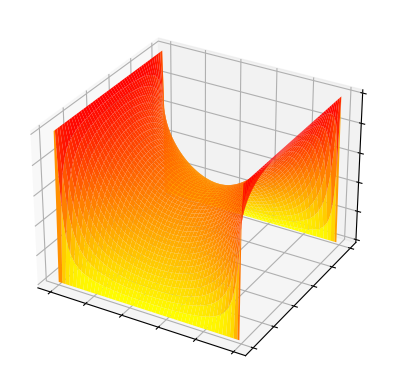

In [49]:
# Plot the surface
X, Y = np.arange(100), np.arange(100)
X, Y = np.meshgrid(X, Y)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, T, cmap=cm.autumn_r)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()


In [50]:
fig = go.Figure(data=[go.Surface(z=T)])
fig.show()